In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Correlation

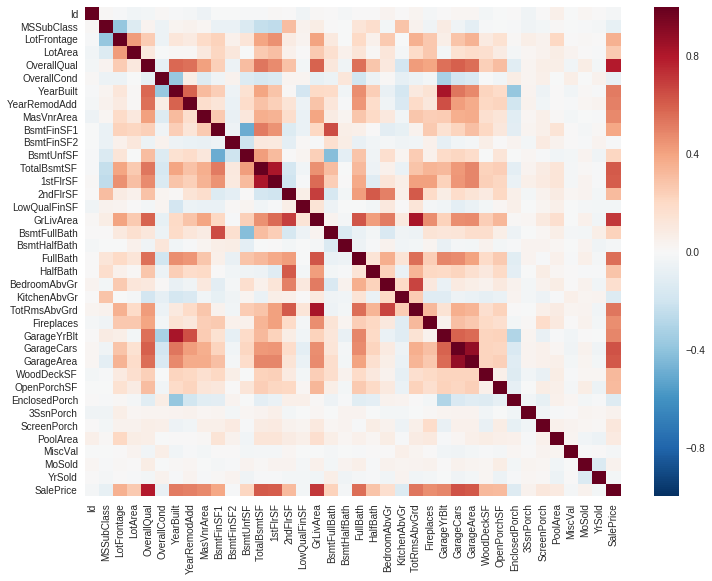

In [3]:
#correlation matrix
corrmat = df_train.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat)

In [4]:
corrmat.nlargest(81,'SalePrice')['SalePrice']

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [5]:
#feature related to GrLivArea
df_train[['GrLivArea',]].describe()

,GrLivArea
count,1460.000000
mean,1515.463699
std,525.480383
min,334.000000
25%,1129.500000
50%,1464.000000
75%,1776.750000
max,5642.000000


## Missing data

In [6]:
df_null = df_train.isnull().sum()
#print (len(df_null))
df1 = pd.DataFrame()
for idx_num in range(len(df_null)):
    if df_null.values[idx_num] != 0:
        df_temp = pd.DataFrame(index = [df_null.index[idx_num]],data = [df_null.values[idx_num]])
        df1 = df1.append(df_temp)
print (df1)

                 0
LotFrontage    259
Alley         1369
MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
FireplaceQu    690
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
PoolQC        1453
Fence         1179
MiscFeature   1406


In [7]:
# handle the missing data

# Alley : NA means no alley, so change it to 'None'
df_train.loc[:,'Alley'] = df_train.loc[:,'Alley'].fillna('None')
# FireplaceQu : NA means no Fireplace
df_train.loc[:,'FireplaceQu'] = df_train.loc[:,'FireplaceQu'].fillna('None')
# PoolQC : NA means no pool
df_train.loc[:,'PoolQC'] = df_train.loc[:,'PoolQC'].fillna('None')
# Fence : NA means no fence
df_train.loc[:,'Fence'] = df_train.loc[:,'Fence'].fillna('None')
# MiscFeature : NA means no feature, and its MiscVal should be 0
df_train.loc[:,'MiscFeature'] = df_train.loc[:,'MiscFeature'].fillna('None')
## LotFrontage : make it 0 first
df_train.loc[:,'LotFrontage'] = df_train.loc[:,'LotFrontage'].fillna(0)
## MasVnrType : NaN most likely to be None, make it None first
df_train.loc[:,'MasVnrType'] = df_train.loc[:,'MasVnrType'].fillna('None')
## MasVnrArea : NaN is the same with MasVnrType, make it 0 first
df_train.loc[:,'MasVnrArea'] = df_train.loc[:,'MasVnrArea'].fillna(0)
# BsmtQual : NA means no basement 
df_train.loc[:,'BsmtQual'] = df_train.loc[:,'BsmtQual'].fillna('None')
# BsmtCond : NA means no basement
df_train.loc[:,'BsmtCond'] = df_train.loc[:,'BsmtCond'].fillna('None')
# BsmtExposure : NA means no basement, but index 948 is strange, based on other data with unfinished basement, the Nan is mostly 'No'
df_train.loc[948,'BsmtExposure'] = 'No'
df_train.loc[:,'BsmtExposure'] = df_train.loc[:,'BsmtExposure'].fillna('None')
# BsmtFinType1 : NA means no basement
df_train.loc[:,'BsmtFinType1'] = df_train.loc[:,'BsmtFinType1'].fillna('None')
# BsmtFinType2 : NA means no basement
df_train.loc[:,'BsmtFinType2'] = df_train.loc[:,'BsmtFinType2'].fillna('None')
# Electrical : only one NA, and hard to interpret, just drop the data
df_train = df_train[df_train['Electrical'].notnull()]
# GarageType, GarageYrBlt,GarageFinish,GarageQual,GarageCond : NA means no garage
df_train.loc[:,'GarageType'] = df_train.loc[:,'GarageType'].fillna('None')
df_train.loc[:,'GarageFinish'] = df_train.loc[:,'GarageFinish'].fillna('None')
df_train.loc[:,'GarageQual'] = df_train.loc[:,'GarageQual'].fillna('None')
df_train.loc[:,'GarageCond'] = df_train.loc[:,'GarageCond'].fillna('None')
## Tansfer GarageYrBlt later, fill in 0 first, then deal with it 
df_train.loc[:,'GarageYrBlt'] = df_train.loc[:,'GarageYrBlt'].fillna(0)


In [ ]:
# handle categorical like feature value


In [8]:
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold

# drop 'Id', it is no relationship with SalePrice
df_train = df_train.drop('Id',axis=1)

def simple_linear_test(train_data):
    # use 10-fold Cross validation (stratified means all data will include in validation set)
    skf = StratifiedKFold(train_data,10)
    reg = linear_model.LinearRegression()
    part = 0
    for train,test in skf:
        y_train = train['SalePrice']
        X_train = train.drop('SalePrice',axis=1)
        y_test = test['SalePrice']
        X_test = test.drop('SalePrice',axis=1)
        reg.fit(X_train,y_train)
        pred_test = reg.predict(X_test) 
        print ("%d time RMSE: %.8f" % (rmse(pred_test),y_test))
    
    

In [9]:
# test Area code reference
# ----
# MasVnrType_dist = df_train['MasVnrType'].value_counts()
# print (MasVnrType_dist)
# df_train.loc[df_train['MasVnrType'].isnull()].loc[:,['MasVnrType','MasVnrArea']]
# ----
# df_train.loc[df_train['BsmtExposure'].isnull()].loc[948,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]
# ----
# m = df_train.loc[df_train['BsmtFinType1']=='Unf'].loc[:,['BsmtExposure','BsmtFinType1','BsmtFinType2']]
# m['BsmtExposure'].value_counts()
# ----
# df_train.loc[df_train['BsmtFinType2'].isnull()].loc[332,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]
# ----
# df_train.loc[df_train['GarageType'].isnull()].loc[:,['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']].count()
# ----
# df_train['GarageYrBlt'].describe()